**Цель работы:**

Изучение связи между признаками двумерного набора данных,
визуализация данных

Вариант №9

Набор данных: visits2.csv

Атрибуты:
...

### 1.Чтение файла (набора данных)

In [1]:
# Импорт основных библиотек для анализа данных и визуализации и чтение файла
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('visits2.csv', sep=';')
# Выведем первые 5 строк
display(df.head())

,user_id,region,device,channel,session_start,session_end,time_session,click_count,buy_count,price,age
0,278965908054,United States,iPhone,organic,01.05.2019 4:46,01.05.2019 4:47,1.0,0.0,0.0,0.0,31
1,244878945432,United States,Mac,organic,01.05.2019 16:44,01.05.2019 16:45,1.0,0.0,0.0,0.0,40
2,590706206550,United States,Mac,organic,01.05.2019 14:09,01.05.2019 15:32,83.0,28.0,6.0,14570.0,50
3,326433527971,United States,Android,TipTop,01.05.2019 0:29,01.05.2019 0:54,25.0,8.0,3.0,4411.0,38
4,349773784594,United States,Mac,organic,01.05.2019 3:33,01.05.2019 3:57,24.0,8.0,3.0,4411.0,63


1.2 Оценка датасета через info и describe, проверка на дубликаты и заполнение пропусков.

In [2]:
# Вывод общей информации
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        954 non-null    int64  
 1   region         953 non-null    object 
 2   device         953 non-null    object 
 3   channel        954 non-null    object 
 4   session_start  954 non-null    object 
 5   session_end    954 non-null    object 
 6   time_session   954 non-null    float64
 7   click_count    954 non-null    float64
 8   buy_count      954 non-null    float64
 9   price          954 non-null    float64
 10  age            954 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 82.1+ KB


In [3]:
# Вывод описательной статистики
pd.set_option('display.float_format', '{:.5f}'.format)
display(df.describe())

# Проверка на наличие дубликатов
print('Дубликатов: ', df.duplicated().sum())

,user_id,time_session,click_count,buy_count,price,age
count,954.00000,954.00000,954.00000,954.00000,954.00000,954.00000
mean,495180693122.14673,29.06289,9.83019,2.52725,5341.55975,39.81027
std,289948785669.78723,27.13482,9.20904,1.60200,5060.24769,13.03803
min,2346324608.00000,0.00000,0.00000,0.00000,0.00000,10.00000
25%,229512214402.25000,9.00000,3.00000,2.00000,2301.00000,29.00000
50%,498426656077.00000,21.00000,7.00000,2.00000,3739.00000,39.00000
75%,752533181698.50000,42.00000,14.00000,3.00000,7284.00000,50.00000
max,998513020664.00000,262.00000,88.00000,15.00000,56546.00000,71.00000


Дубликатов:  0


In [ ]:
# Проверка на пропуски
missing_data = df.isna().sum()
print(missing_data[missing_data > 0])

# Заполнение пропусков модой
mode_region = df['region'].mode()[0]
df['region'].fillna(mode_region, inplace=True)

mode_device = df['device'].mode()[0]
df['region'].fillna(mode_device, inplace=True)
print(f"Пропуски были заполнены модой, для region {mode_region}, для device {mode_device}")

region    1
device    1
dtype: int64
Пропуски были заполнены модой, для region United States, для device iPhone


C:\Users\fedor\AppData\Local\Temp\ipykernel_4328\3172009382.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['region'].fillna(mode_region, inplace=True)


1.3 Проверка и изменение неявных дубликатов

In [5]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Создаем словарь для хранения уникальных значений каждого категориального столбца
unique_values = {}

# Анализируем каждый категориальный столбец
for column in categorical_columns:
    print(f"\n Анализ столбца: {column}")
    print("Уникальные значения и их частота:")
    # Получаем частоту каждого значения
    value_counts = df[column].value_counts()
    print(value_counts)
    
    # Сохраняем уникальные значения для дальнейшего анализа
    unique_values[column] = value_counts.index.tolist()
    
# Создаем копию DataFrame для безопасного изменения
df_clean = df.copy()


 Анализ столбца: region
Уникальные значения и их частота:
region
United States    901
Russia            52
USA                1
Name: count, dtype: int64

 Анализ столбца: device
Уникальные значения и их частота:
device
iPhone     419
Mac        243
Android    185
PC         103
IPHONE       2
MAC          1
Name: count, dtype: int64

 Анализ столбца: channel
Уникальные значения и их частота:
channel
organic         610
FaceBoom        149
TipTop          142
MediaTornado     53
Name: count, dtype: int64

 Анализ столбца: session_start
Уникальные значения и их частота:
session_start
02.05.2019 9:40     4
02.05.2019 20:16    4
02.05.2019 1:22     4
02.05.2019 22:44    4
02.05.2019 13:55    3
                   ..
02.05.2019 13:43    1
03.05.2019 18:54    1
02.05.2019 11:59    1
02.05.2019 12:05    1
02.05.2019 21:07    1
Name: count, Length: 819, dtype: int64

 Анализ столбца: session_end
Уникальные значения и их частота:
session_end
02.05.2019 2:40     3
01.05.2019 7:49     3
02.05.20

In [18]:
print("Исправление неявных дубликатов в столбце region:")

df_clean['region'] = df['region'].replace('USA', 'United States')

# Проверяем результат
print("\nОбновленное распределение значений в region:")
print(df_clean['region'].value_counts())


print("\nИсправление неявных дубликатов в столбце device:")

df_clean['device'] = df['device'].replace({'IPHONE': 'iPhone', 'MAC': 'Mac'})


# Проверяем результат
print("\nОбновленное распределение значений в device:")
print(df_clean['device'].value_counts())

# Теперь присваиваем очищенный DataFrame обратно в df
df = df_clean

Исправление неявных дубликатов в столбце region:

Обновленное распределение значений в region:
region
United States    902
Russia            52
Name: count, dtype: int64

Исправление неявных дубликатов в столбце device:

Обновленное распределение значений в device:
device
iPhone     421
Mac        244
Android    185
PC         103
Name: count, dtype: int64



 #### Промежуточный вывод о данных
Данные содержат 954 записи о сессиях интернет-магазина с 11 признаками, включая уникальный идентификатор пользователя, страна пользователя, устройство пользователя, идентификатор рекламного источника, из которого пришел пользователь, дата и время начала сессии, дата и время окончания сессии, время сессии в минутах, кол-во кликов пользователя, количество товаров в корзине, стоимость покупок и возраст пользователя.

Пропуски: region и device — по 1 пропущенному значению.

Были неявные дубликаты, которые были исправлены


### 2. Построение диаграмм

2.1 Построение точечной диаграммы

Матрица диаграмм рассеяния:


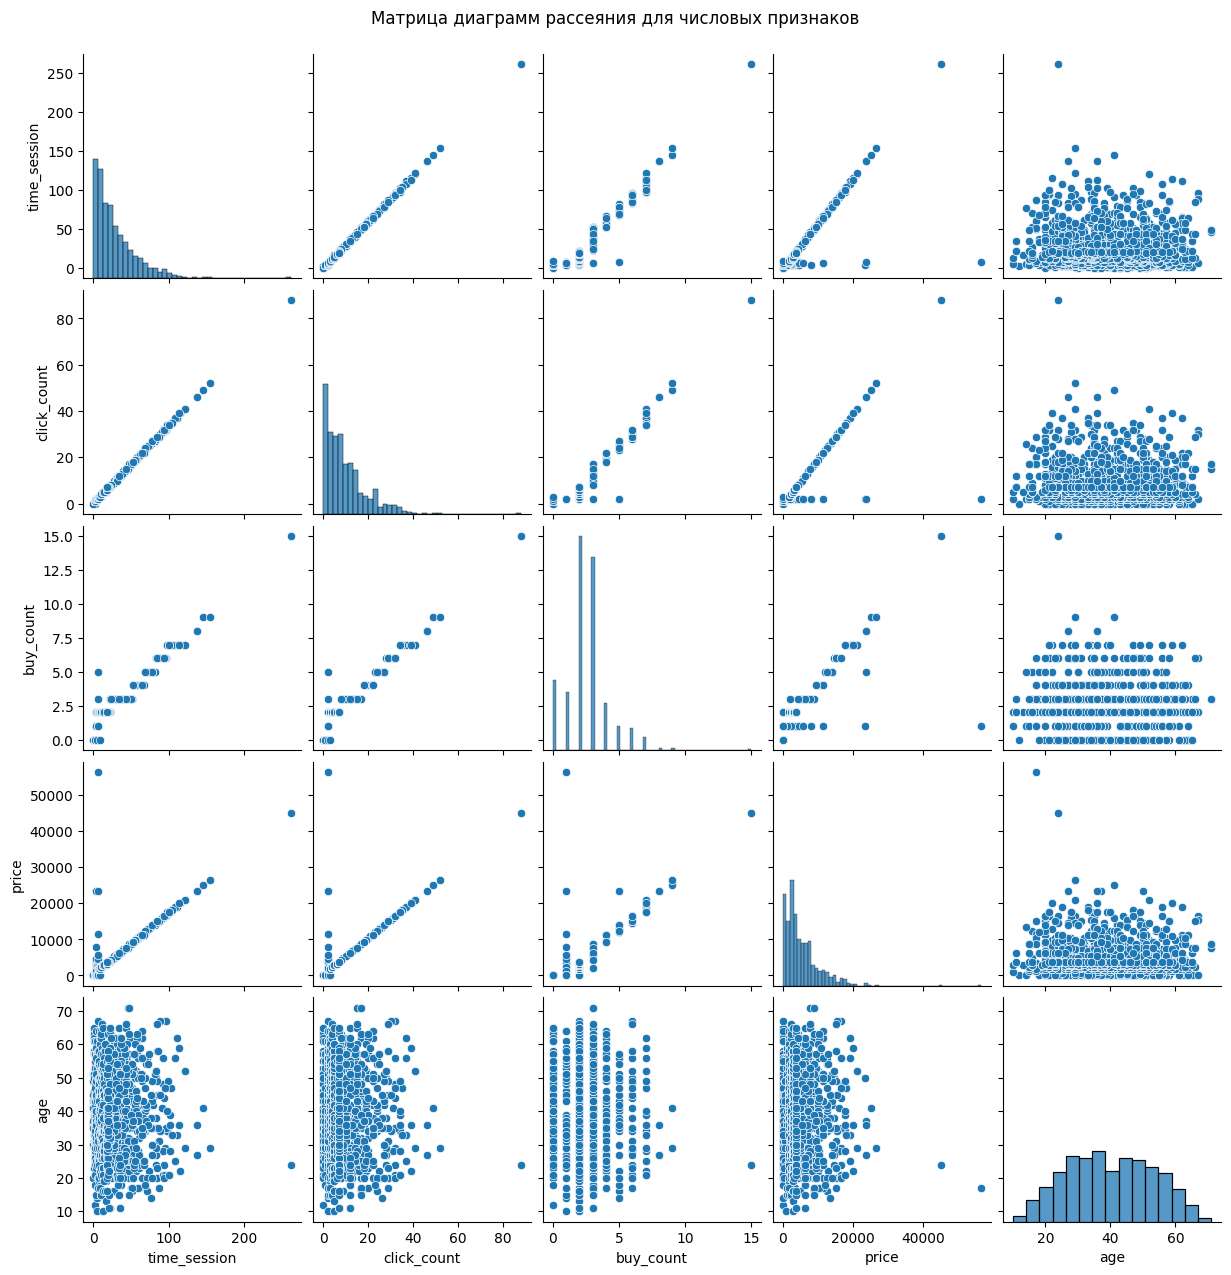

Диаграмма рассеяния: Стоимость покупки vs. Возраст (по устройствам)


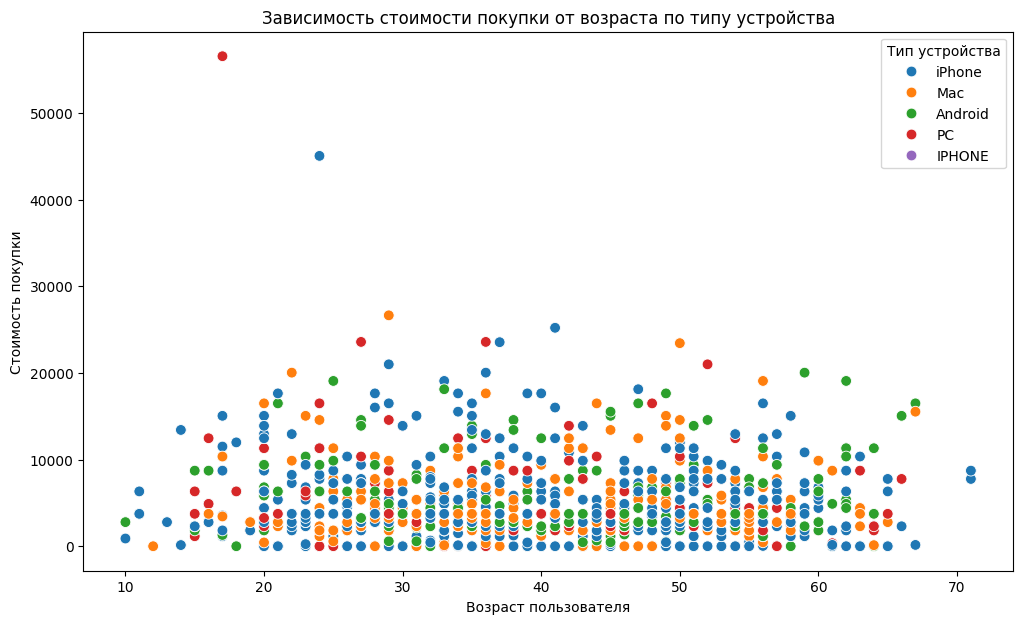

In [ ]:
# Построение матрицы диаграмм рассеяния для числовых признаков
print("Матрица диаграмм рассеяния:")
sns.pairplot(df[['time_session', 'click_count', 'buy_count', 'price', 'age']])
plt.suptitle('Матрица диаграмм рассеяния для числовых признаков', y=1.02)
plt.show()

# Зависимость стоимости покупки от возраста пользователя по используемому устройству
print("Диаграмма рассеяния: Стоимость покупки vs. Возраст (по устройствам)")
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='age', y='price', hue='device', s=60)
plt.title('Зависимость стоимости покупки от возраста по типу устройства')
plt.xlabel('Возраст пользователя')
plt.ylabel('Стоимость покупки')
plt.legend(title='Тип устройства')
plt.show()


 ## Промежуточный вывод о данных
- Видны прямые корреляции времени сессии и количества кликов, количества товаров в корзине и суммы покупок. Чем больше время сессии, тем выше все эти показатели, аналогично с количеством кликов, чем их больше, тем больше товаров в корзине и больше сумма покупок.
- Между временем сессии и возрастом сильных корреляций нет, разве что видны просадки в 30 и 55 лет и после 60 сильный спад, это объясняется тем, что люди, которым больше 60 лет намного реже сидят в интернете и заходят в интернет-магазины.
- Больше всех покупок делают люди в возрасте от 20 до 35 и в промежутке от 45 до 55.
- На графике по категориям видно, что стоимости покупок выше всего в 20-40 лет, это объясняется тем, что в этом возрасте люди совершают много покупок и у них есть на это возможность, также наблюдается небольшая аномалия в 50 лет, стоимость резко возрастает, а потом опять падает
- Видна корреляция стоимости покупок и вида девайса, дорогие покупки чаще совершаются с помощью iPhone и Mac.


2.2 Построение гистограмм для каждого числового признака

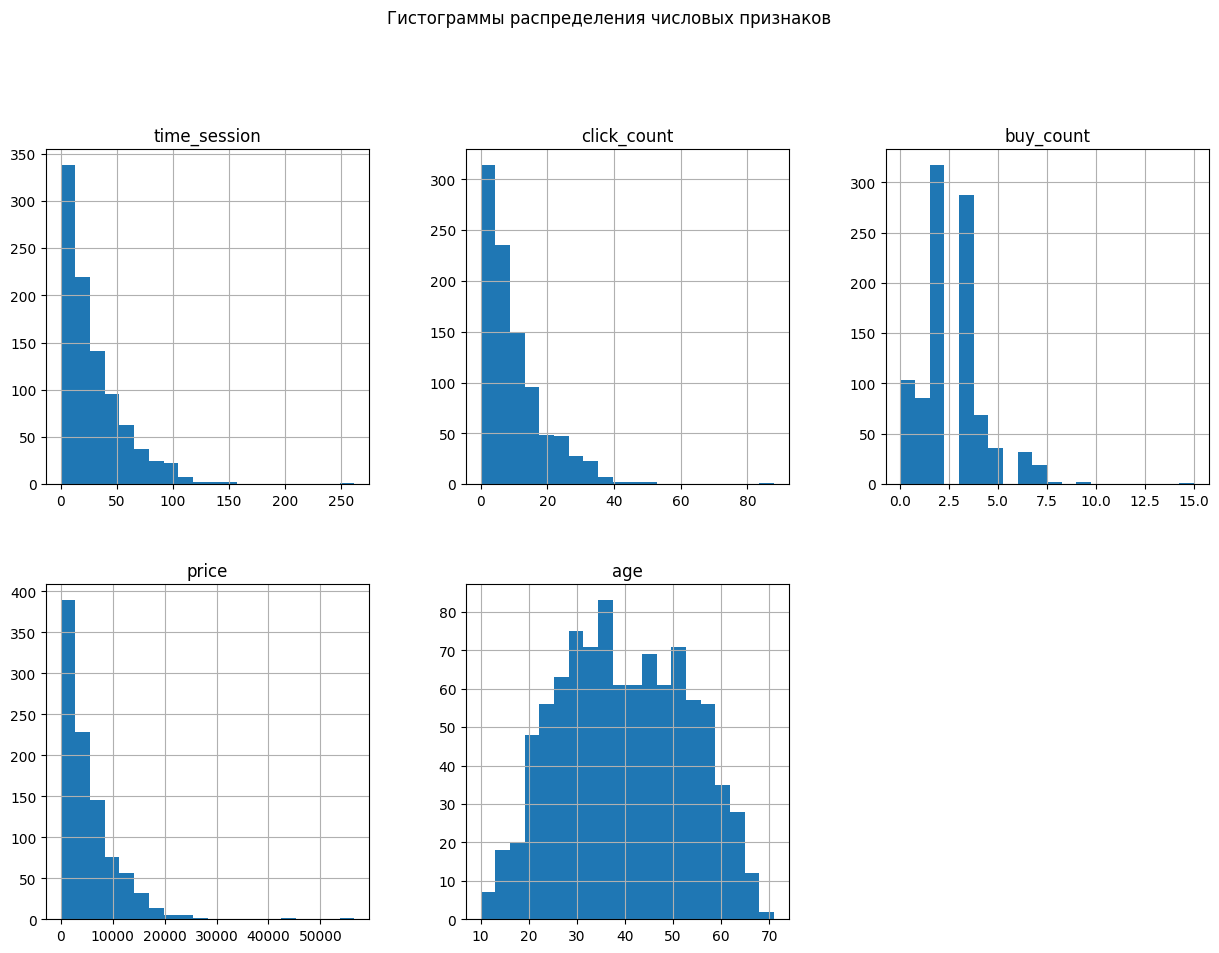

In [8]:
# Выбираем только числовые столбцы для построения гистограмм
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Удаляем 'user_id', так как это идентификатор
numeric_cols.remove('user_id ')

# Построение гистограмм для каждого числового признака
df[numeric_cols].hist(bins=20, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Гистограммы распределения числовых признаков', y=1.02)
plt.show()


 ## Промежуточный вывод о данных
- Распределение возраста напоминает нормальное, с пиком в районе 35 лет, с сильной просадкой в 40 лет.
- Распределение стоимости покупок скошено вправо. Это означает, что большинство покупок недорогие
- Большинство сессий короткие (до 30 минут), что также является распределением, скошенным вправо


2.3 Построение тепловой карты корреляции.

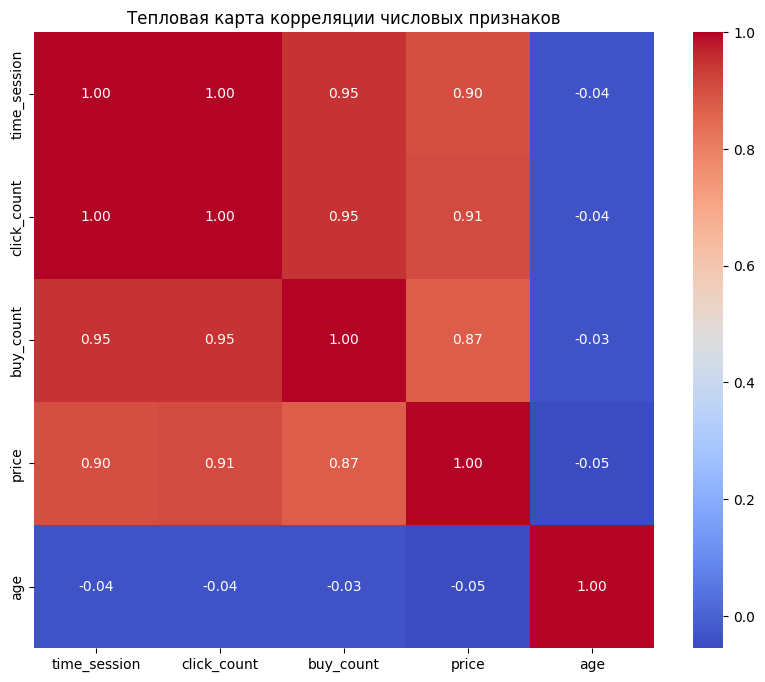

In [19]:
# Вычисление матрицы корреляций
correlation_matrix = df[numeric_cols].corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции числовых признаков')
plt.show()


## Промежуточный вывод о данных
- Высокая корреляция видна между всеми признаками, кроме возраста, видно, что он никак не влияет ни на какие показатели
- Больше всего коррелируют время сессии и количество кликов


### 3. Выполнение заданий варианта

#### Задание 1 По группировке - region и количество клиентов, привлеченных из рекламных источников каждого типа

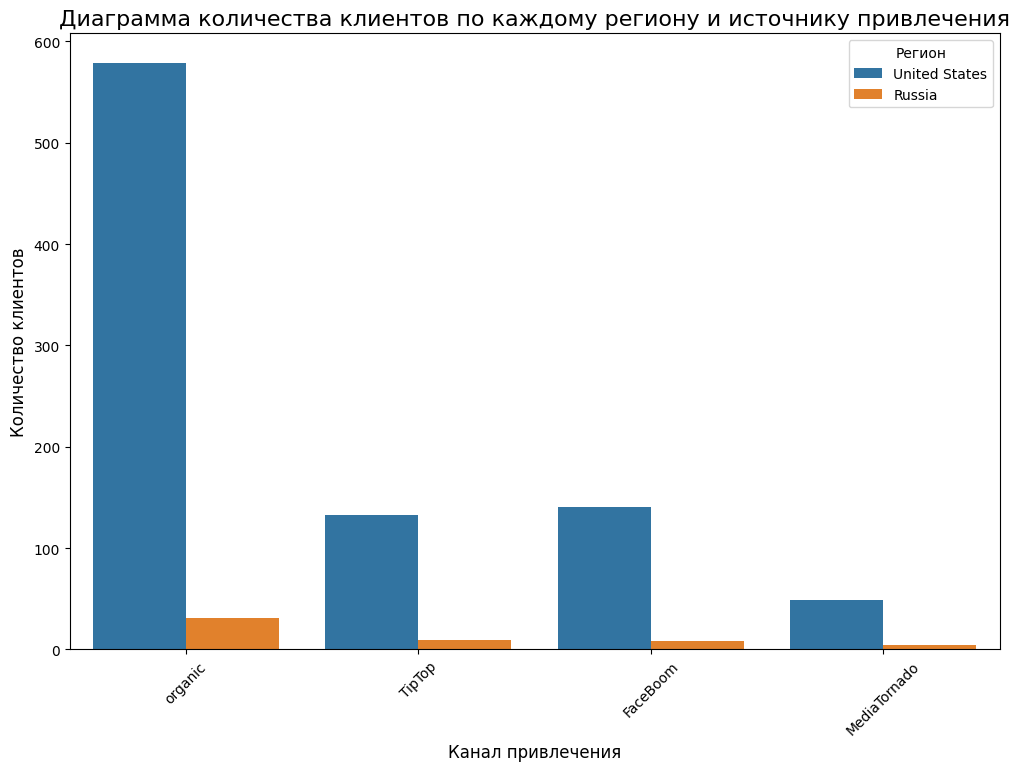

In [10]:
# Группируем данные и строим график
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='channel', hue='region')

# Настройка графика
plt.title('Диаграмма количества клиентов по каждому региону и источнику привлечения', fontsize=16)
plt.xlabel('Канал привлечения', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Регион')
plt.show()

#### Выводы
- Больше всего клиентов переходит из источника organic, затем иду примерно наравне TipTop и FaceBoom и меньше всего в MediaTornado
- Заметно больше клиентов приходит из США, но распределение по источникам что в США, что в России одинаковое


#### Задание 2 . По сводной таблице (pivot_table) - отобразить уникальное (nunique) количество пользователей для каждого канала (channel). Оставить только маркеры в виде 🞀 синего цвета размером 15

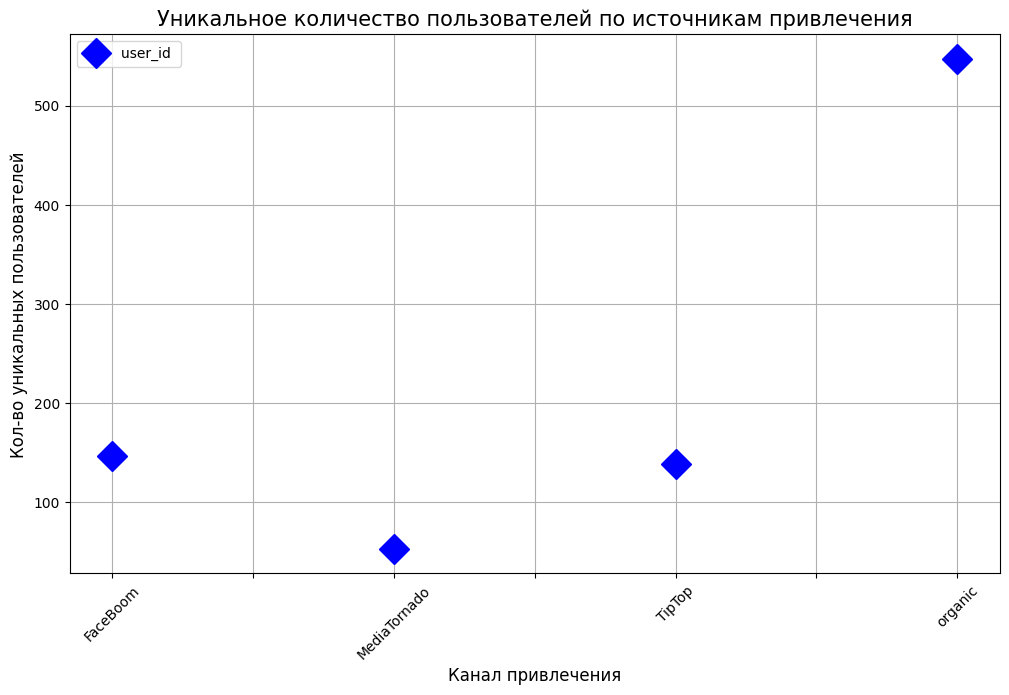

In [20]:
# Создание сводной таблицы
unique_users_by_channel = df.pivot_table(
    index='channel',
    values='user_id ',
    aggfunc='nunique'
)
plt.figure(figsize=(12, 7))

# Создание графика
unique_users_by_channel.plot(
    marker='D',
    color='b',        
    markersize=15,    
    linestyle='None', 
    grid=True,         
    ax=plt.gca()       
)

# Настройка графика
plt.title('Уникальное количество пользователей по источникам привлечения', fontsize=15)
plt.xlabel('Канал привлечения', fontsize=12)
plt.ylabel('Кол-во уникальных пользователей', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### Выводы
- Этот график показывает количество уникальных пользователей, пришедших из каждого рекламного канала. Он подтверждает выводы предыдущего графика: organic является лидирующим каналом по привлечению уникальных пользователей, в то время как MediaTornado привлекает меньше всего клиентов

#### Задание 3 Построить круговую диаграмму, которая отображает процент каждого устройства

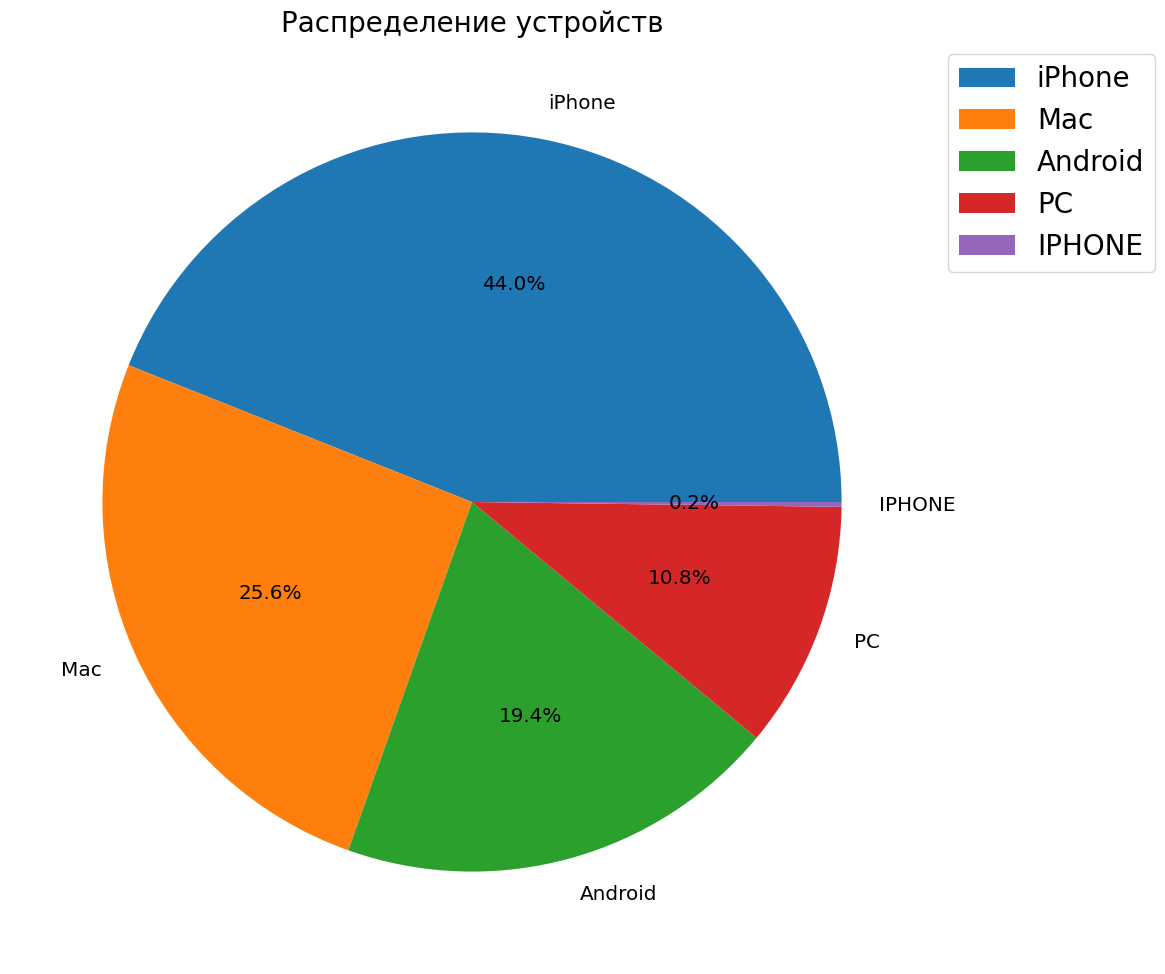

In [12]:
# Подсчет количества для каждого устройства
device_counts = df['device'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(12, 12))
plt.pie(device_counts, labels=device_counts.index, autopct='%.1f%%', textprops={'size': 'x-large'})

# Настройка графика
plt.title('Распределение устройств', fontsize=20)
plt.legend(fontsize=20, bbox_to_anchor=(1, 1))
plt.show()

#### Выводы:
- Самое популярное устройство — iPhone (44.2%), за ним следует Mac (25.6%). Это говорит о том, что значительная часть клиентов магазина использует продукцию Apple. PC используется реже всего (10.8%)

### 4. Дальнейшее построение графиков и диаграмм

4.1 Hexagonal binning диаграмма зависимости стоимости покупки от возраста

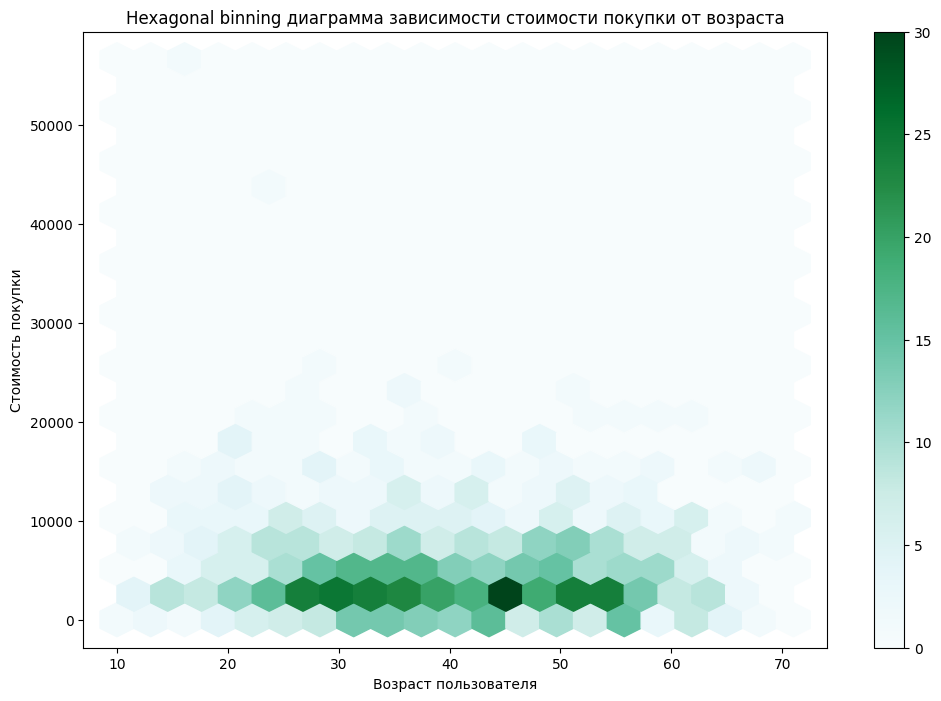

In [ ]:
# Построение hexagonal binning plot
df.plot(
    kind='hexbin',
    x='age',
    y='price',
    gridsize=20,    
    figsize=(12, 8),
    sharex=False
)
# Настройка диаграммы
plt.title('Hexagonal binning диаграмма зависимости стоимости покупки от возраста')
plt.xlabel('Возраст пользователя')
plt.ylabel('Стоимость покупки')
plt.show()

#### Выводы
- Наибольшая плотность наблюдений (самые темные ячейки) сосредоточена в области пользователей возрастом от 25 до 55 лет, совершающих покупки на небольшие суммы (до 15000)

4.2 Диаграмма размаха для стоимости покупок

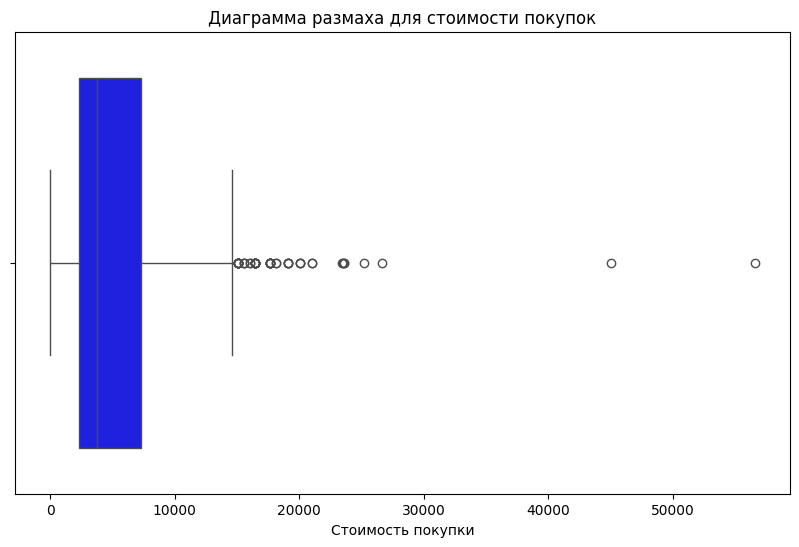

In [14]:
# Построение boxplot для стоимости покупок
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'], color='blue')
plt.title('Диаграмма размаха для стоимости покупок')
plt.xlabel('Стоимость покупки')
plt.show()

#### Выводы
- Этот график показывает, что 50% всех покупок имеют стоимость примерно от 3000 до 7000 (межквартильный размах, "ящик"). Медианная стоимость покупки (линия внутри ящика) составляет около 4000

4.3 Создание категории возрастная группа и построение boxplot по ней

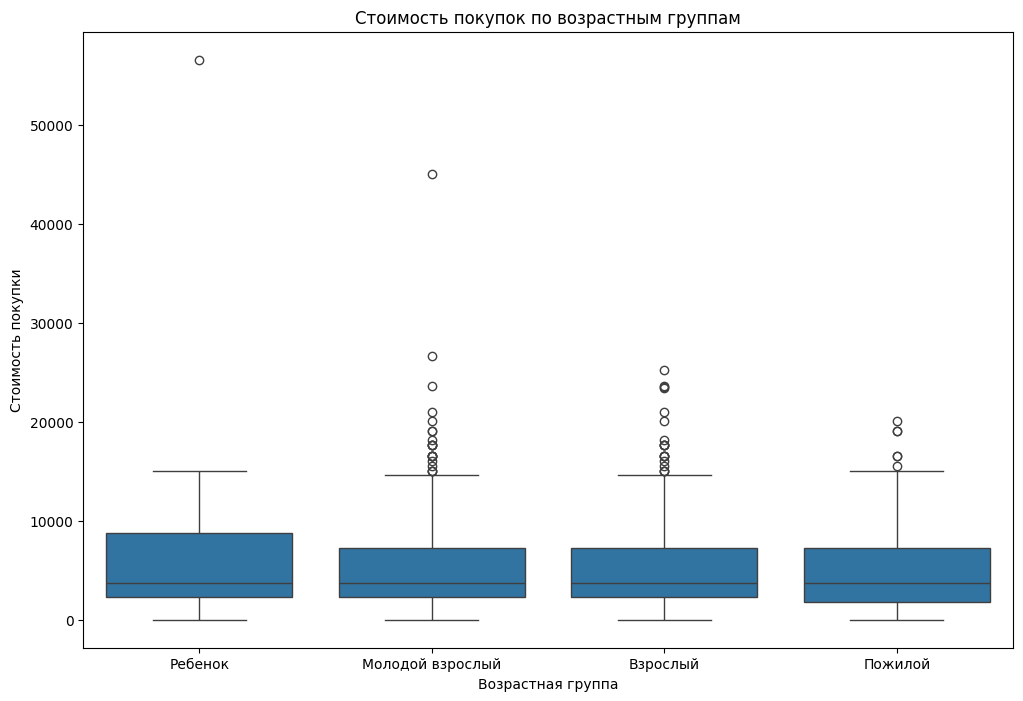

In [15]:
# Создание новой категориальной переменной 'age_group'
bins = [0, 18, 35, 55, 100]
labels = ['Ребенок', 'Молодой взрослый', 'Взрослый', 'Пожилой']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Построение boxplot стоимости покупки по возрастным группам
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='age_group', y='price')
plt.title('Стоимость покупок по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Стоимость покупки')
plt.show()

#### Выводы
- Из этого графика видно, что хотя медианная стоимость покупки примерно одинакова для всех возрастных групп, у "молодых взрослых" и "взрослых" наблюдается наибольший разброс цен и самые дорогие покупки (выбросы). Это может указывать на более высокую покупательскую способность этих групп

4.4 Создание двух boxplot: время сессии по типу устройства (используя Seaborn), стоимость покупки по каналу привлечения (используя Matplotlib) 

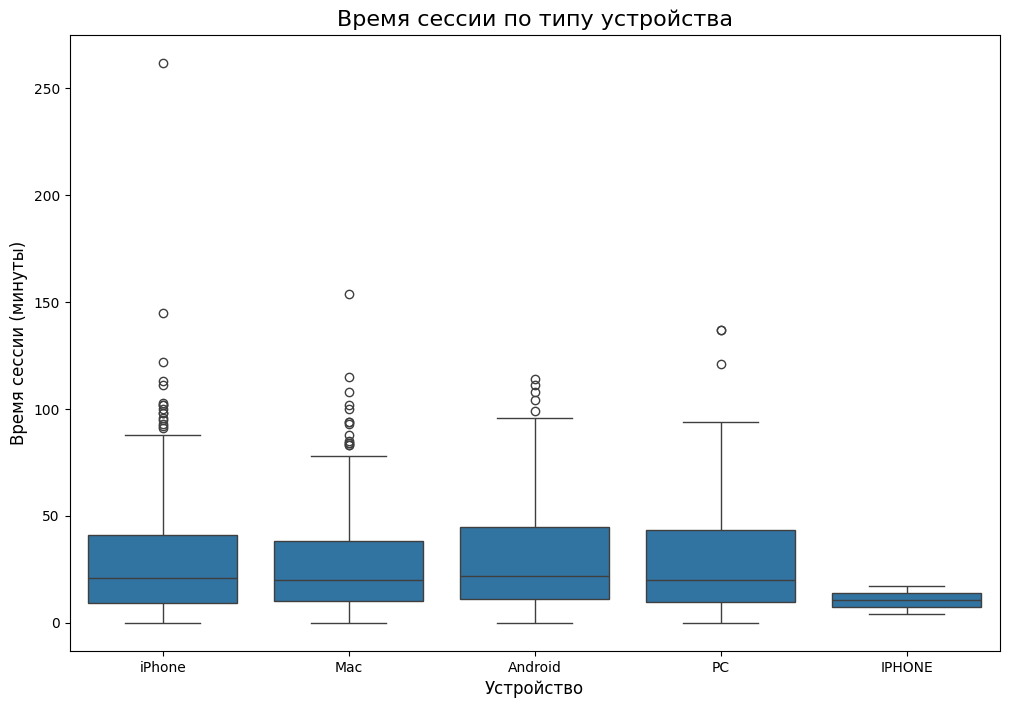

In [ ]:
# Создание и настройка графика
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='device', y='time_session')
plt.title('Время сессии по типу устройства', fontsize=16)
plt.xlabel('Устройство', fontsize=12)
plt.ylabel('Время сессии (минуты)', fontsize=12)
plt.show()

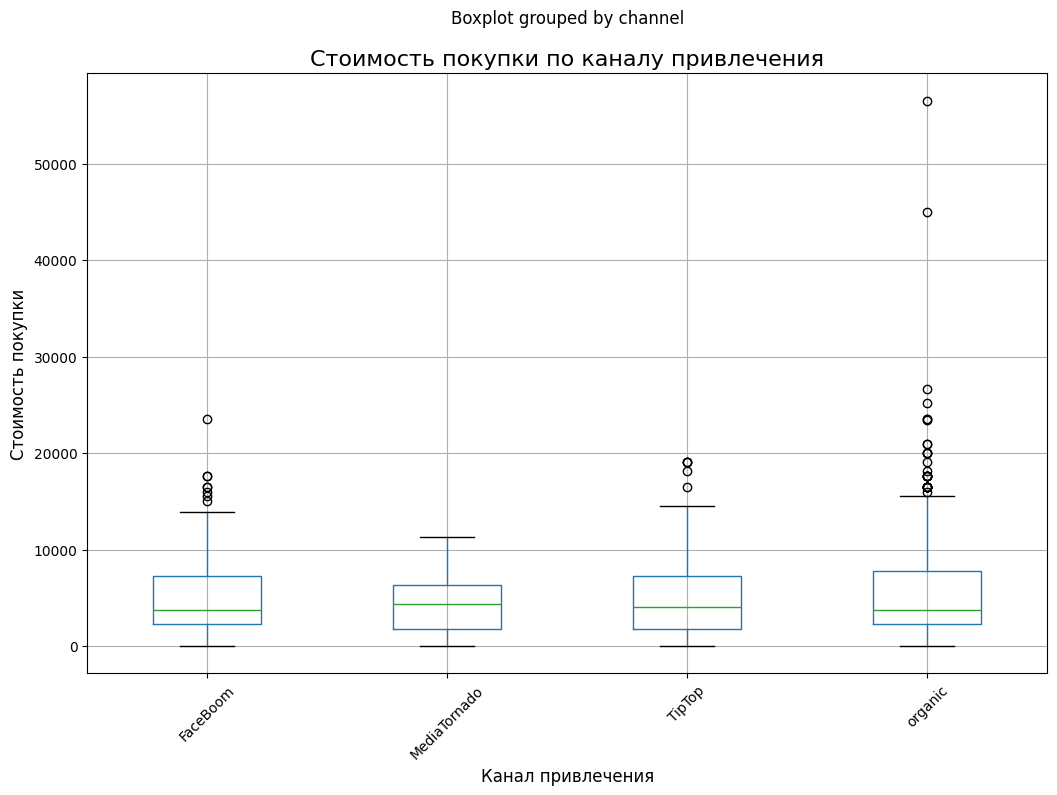

In [ ]:
# Создание и настройка графика
df.boxplot(column='price', by='channel', figsize=(12, 8))
plt.title('Стоимость покупки по каналу привлечения', fontsize=16)
plt.xlabel('Канал привлечения', fontsize=12)
plt.ylabel('Стоимость покупки', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### Выводы
- Медианное время сессии самое высокое у пользователей iPhone и Android. Пользователи PC и Mac в среднем проводят на сайте меньше времени. Больше всего выбросов у пользователей с iPhone и Mac
- Этот график показывает, что медианная стоимость покупки примерно одинакова для всех каналов. Однако из MediaTornado приходит хоть и мало пользователей, но все совершают довольно дорогие покупки, но на удивление в этом источнике нет ни одного выброса.
- Больше всего выбросов у пользователей, пришедших  из organic, там же и самая низкая медиана, скорее всего из-за того что оттуда пришло больше всего пользователей

# Общие выводы по работе

В ходе выполнения лабораторной работы был проведен анализ данных о пользовательских сессиях магазина. Было произведено ознакомление с различными видами диаграмм и способами их построений.

Данные: Исходный датасет visits2.csv содержал несколько пропусков и неявных дубликатов, которые были заменены или исправлены.

Портрет пользователя: Типичный пользователь — это человек в возрасте 25–55 лет, заходящий на сайт с устройства Apple (iPhone или Mac) из США. Большинство сессий короткие, с небольшим количеством кликов и покупок на малую сумму.

Зависимости: была выявлена сильная и очевидная положительная корреляция между всеми числовыми признаками кроме возраста, например, чем больше время сессии, тем больше кликов, товаров в корзине и выше сумма покупок.

Каналы и устройства: наиболее эффективным каналом привлечения как по общему количеству, так и по уникальным пользователям является organic. Самые дорогие покупки в среднем совершаются клиентами, пришедшими из MediaTornado, но organic приводит больше клиентов, готовых заплатить больше (выбросы), и пользователями, использующими Mac и iPhone.

